In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import RepetitionCode, ThresholdLAB

In [2]:
rep = RepetitionCode(
    distance = 3,
    depolarize1_rate = 0.05,
    depolarize2_rate = 0.05
)

rep.build_memory_circuit(number_of_rounds=1)
rep.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.05)-@-DEPOLARIZE2(0.05)-----------------------------------------------------------------------------------------DEPOLARIZE1(0.05)--M:rec[2]-DETECTOR:D2=rec[2]*rec[3]*rec[0]-OBSERVABLE_INCLUDE:L0*=rec[2]-
                         | |
q1: -R-DEPOLARIZE1(0.05)-|-|-----------------@-DEPOLARIZE2(0.05)-@-DEPOLARIZE2(0.05)-------------------------------------------------DEPOLARIZE1(0.05)--M:rec[3]-DETECTOR:D3=rec[3]*rec[4]*rec[1]-------------------------------
                         | |                 | |                 | |
q2: -R-DEPOLARIZE1(0.05)-|-|-----------------|-|-----------------|-|-----------------@-DEPOLARIZE2(0.05)-----------------------------DEPOLARIZE1(0.05)--M:rec[4]----------------------------------------------------------------
                         | |                 | |                 | |                 | |
q3: -R-DEPOLARIZE1(0.05)-X-DEPOLARIZE2(0.05)-|-|-----------------X-DEPOLARIZE2(0.05)-|-|-----------------DEPOLARIZE1(0.05)-MR:rec[0]-DETECTOR:D0=rec[0]-------------------------------------------------------------------------
                                             | |                                     | |
q4: -R-DEPOLARIZE1(0.05)---------------------X-DEPOLARIZE2(0.05)---------------------X-DEPOLARIZE2(0.05)-DEPOLARIZE1(0.05)-MR:rec[1]-DETECTOR:D1=rec[1]-------------------------------------------------------------------------

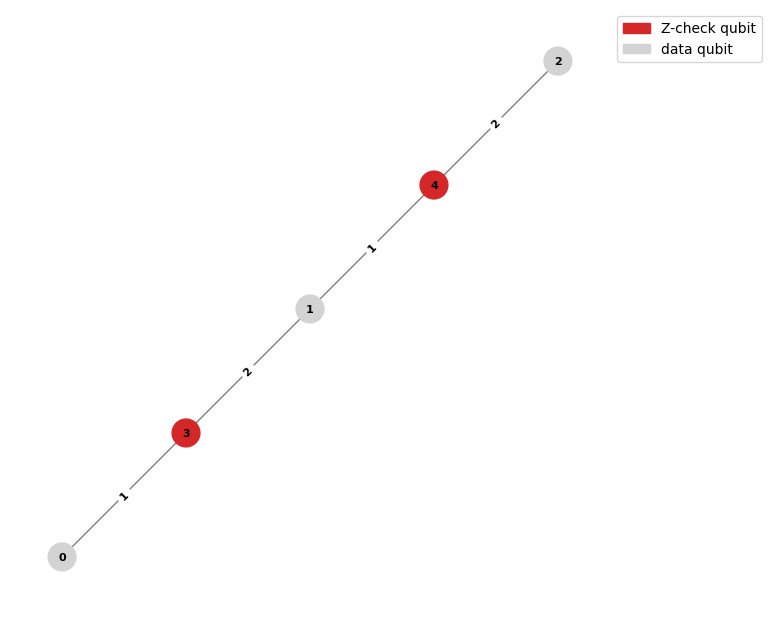

In [3]:
rep.draw_graph()

In [4]:
th = ThresholdLAB(
    distances= [3, 5, 7, 11],
    code=RepetitionCode,
    error_rates= np.linspace(0, 0.1, 10)
)

th.collect_stats(num_shots=10**4)

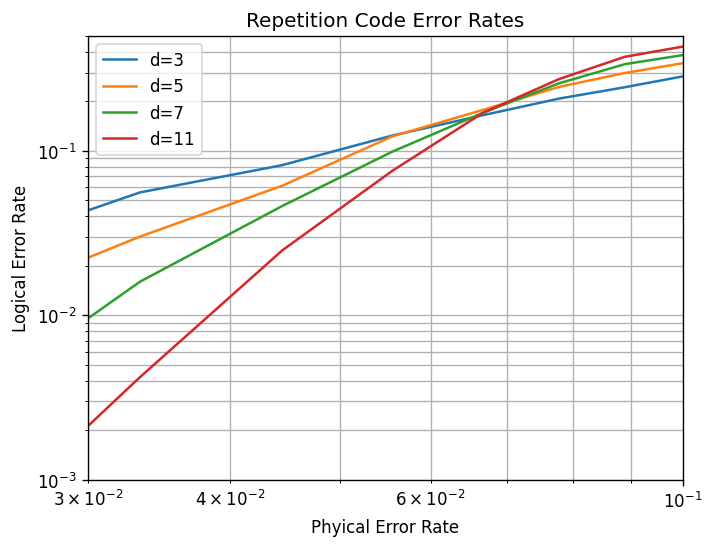

In [5]:
th.plot_stats(
    x_min = 3e-2, 
    x_max = 1e-1,
    y_min = 1e-3, 
    y_max = 5e-1
)